# Dynamic Programming

##  Q.1. Discrete MDP model

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
class MDP:
    def __init__(self,epsilon,gamma):
        self.epsilon = epsilon
        self.gamma = gamma
        
        
    def proba_matrix_eval(self,proba_matrix,policy):
        proba_matrix_ = []
        for i,action in enumerate(policy):
            proba_matrix_.append(list(np.transpose(proba_matrix[i])[action]))
        return np.array(proba_matrix_)

    def reward_matrix_eval(self,reward_matrix,policy):
        reward_matrix_ = []
        for i,action in enumerate(policy):
            reward_matrix_.append(reward_matrix[i][action])
        return np.array(reward_matrix_)
    
    
    def fit_value(self,proba_matrix,reward_matrix):
        """
        Parameters:
        ----------
        proba_matrix : shape = (n_states,n_states,n_actions) contains the transition probabilities
        reward_matrix : shape = (n_states,n_actions) contains the rewards
        """
        #We initialize the value function of dimension 3
        V = np.random.randn(3,1)
        V_old = 10*V
        
        iter_ = 0
        
        V_values = []
        
        while np.linalg.norm(V_old - V,ord = np.inf) > self.epsilon:
            V_old = V
            
            V = np.array([np.max([reward_matrix[i][k] + self.gamma * np.sum([proba_matrix[i][j][k]*V[j] for j in range(V.shape[0])])\
                       for k in range(reward_matrix.shape[1])]) for i in range(V.shape[0])])
            
            V_values.append(V)
            
            iter_ += 1
            
        print('Number of iterations is ',iter_)
        print('Max number of iterations is ',np.log(np.max(reward_matrix)/self.epsilon)/np.log(1/self.gamma))
        
        best_policy = [np.argmax([reward_matrix[i][k] + self.gamma * np.sum([proba_matrix[i][j][k]*V[j] for j in range(V.shape[0])])\
                               for k in range(reward_matrix.shape[1])]) for i in range(V.shape[0])]
        
        #Now we compute V*
        policy = np.array([1,2,1])
        proba_matrix_ = self.proba_matrix_eval(proba_matrix,policy)
        reward_matrix_ = self.reward_matrix_eval(reward_matrix,policy)
            
        best_value = np.linalg.inv(np.identity(proba_matrix_.shape[0]) - self.gamma*proba_matrix_).dot(reward_matrix_)
        
        return best_policy,best_value,V_values
    
    
    def fit_policy(self,proba_matrix,reward_matrix):
        """
        Parameters:
        ----------
        proba_matrix : shape = (n_states,n_states,n_actions) contains the transition probabilities
        reward_matrix : shape = (n_states,n_actions) contains the rewards
        """
        #We initialize the policy
        policy = np.array([1,1,2])
        
        V = np.random.randn(3,1)
        V_old = 10*V
        
        V_values = []
        
        iter_ = 0
        
        while np.linalg.norm(V_old - V) != 0:
            
            V_old = V
            
            proba_matrix_ = self.proba_matrix_eval(proba_matrix,policy)
            reward_matrix_ = self.reward_matrix_eval(reward_matrix,policy)
            
            V = np.linalg.inv(np.identity(proba_matrix_.shape[0]) - self.gamma*proba_matrix_).dot(reward_matrix_)
            
            V_values.append(V)
            
            policy = [np.argmax([reward_matrix[i][k] + self.gamma * np.sum([proba_matrix[i][j][k]*V[j] for j in range(V.shape[0])])\
                               for k in range(reward_matrix.shape[1])]) for i in range(V.shape[0])]
            
            iter_ += 1
        
        print('Number of iterations is ',iter_)   
        
        return policy,V,V_values

In [3]:
proba_matrix = np.zeros((3,3,3))
#Now we fill the matrix

#s0
proba_matrix[0][1][0] = 0.45
proba_matrix[0][0][0] = 0.55

proba_matrix[0][0][1] = 0.3
proba_matrix[0][1][1] = 0.7

proba_matrix[0][0][2] = 1

#s1
proba_matrix[1][0][0] = 1

proba_matrix[1][1][1] = 0.4
proba_matrix[1][2][1] = 0.6

proba_matrix[1][1][2] = 1

#s2
proba_matrix[2][1][0] = 1

proba_matrix[2][2][1] = 0.4
proba_matrix[2][1][1] = 0.6

proba_matrix[2][2][2] = 1

In [4]:
reward_matrix = np.zeros((3,3))

reward_matrix[0][2] = 5/100

reward_matrix[1][2] = 1

reward_matrix[2][1] = 1
reward_matrix[2][2] = 9/10

In [7]:
import time

In [10]:
MDP_ = MDP(epsilon = 10e-2,gamma = 0.95)
t1 = time.time()
best_policy,best_value,V_values = MDP_.fit_value(proba_matrix,reward_matrix)
print('The best policy is ',best_policy)
print('The execution took %f seconds'%(time.time() - t1))

Number of iterations is  45
Max number of iterations is  44.89056748035493
The best policy is  [1, 2, 1]
The execution took 0.010998 seconds


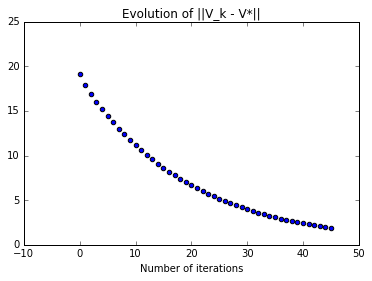

In [85]:
y = [np.linalg.norm(V_values[i] - best_value,ord = np.inf) for i in range(len(V_values))]
x = list(range(len(V_values)))

plt.scatter(x,y)
plt.title('Evolution of ||V_k - V*||')
plt.xlabel('Number of iterations')
plt.show()

## Q.2. Policy iteration

In [11]:
MDP_ = MDP(epsilon = 10e-2,gamma = 0.95)
t1 = time.time()
best_policy2,best_value2,V_values2 = MDP_.fit_policy(proba_matrix,reward_matrix)
print('The execution took %f seconds'%(time.time() - t1))

Number of iterations is  4
The execution took 0.000999 seconds


In [79]:
best_policy2

[1, 2, 1]

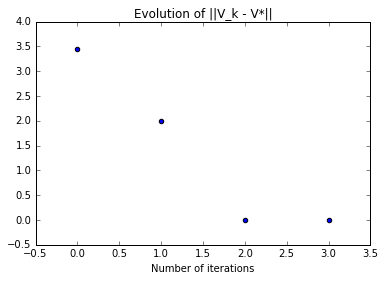

In [80]:
y = [np.linalg.norm(V_values2[i] - best_value2,ord = np.inf) for i in range(len(V_values2))]
x = list(range(len(V_values2)))

plt.scatter(x,y)
plt.title('Evolution of ||V_k - V*||')
plt.xlabel('Number of iterations')
plt.show()

The value iteration (VI) method needs more iterations to converge than policy iteration (PI) but each iteration of VI takes less time than an iteration of PI.

Eventually, we find that PI takes 0.000999 seconds while VI takes 0.010998 seconds. PI is then faster than VI.

The difference between both methods is that the VI method will improve the value function until the algorithm converges while PI method will improve the policy, and since the agent only cares about the policy, PI converges often before VI. 

# Reinforcement learning

In [1]:
import os
os.chdir('C:/Users/Idriss/Desktop/3A/MVA/RL/TPs/TP1/scripts')

In [2]:
from gridworld import GridWorld1
import gridrender as gui
import random
import numpy as np
import time
from matplotlib import pyplot as plt

env = GridWorld1

## Question 4

In [9]:
"""
mu_0 estimation
"""
def estimate_distribution(n_states,n_iter):
    mu = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0}
    
    for _ in range(n_iter):
        state = env.reset()
        mu[state] += 1
        
    for i in range(n_states + 1):
        mu[i] /= n_iter
        
    return mu

mu = estimate_distribution(10,5000)


"""
Monte-Carlo estimation
"""

v_q4 = [0.87691855, 0.92820033, 0.98817903, 0.00000000, 0.67106071, -0.99447514, 0.00000000, -0.82847001, -0.87691855,
        -0.93358351, -0.99447514]


def J_estimation(n_states,gamma,Ns):
    J_n = 0
    J_  = 0
    
    T_max = int(-np.log(10e-2)/(1-gamma)) # delta = 10e-2 , Rmax = 1
        
    for s in range(n_states): 
        
        final_sum = 0
        
        for m in range(Ns):
            
            state = s
            
            term = False
            
            t = 0
            
            interm_sum = 0
            
            while not term or t < T_max :
                
                    if 0 in env.state_actions[state]:
                        action = 0
                    else:
                        action = 3
                    nexts, reward, term = env.step(state,action)
    
                    interm_sum += gamma**(t)*reward
                    
                    state = nexts
                    
                    t += 1  
                    
            final_sum += interm_sum
            
        V_Ns = final_sum/ Ns
        
        J_n  += mu[s]*V_Ns
        J_   += mu[s]*v_q4[s]
        
    return J_n,J_
    

n_states = 11            
gamma = 0.95 #Discount factor
N_values = np.array([random.randint(200,3000) for _ in range(20)])
J_n_values = []

for Ns in N_values:
    J_n,J_ = J_estimation(n_states,gamma,Ns)
    J_n_values.append(J_n)
       
J_diff = [J_n_values[i] - J_ for i in range(len(J_n_values))]

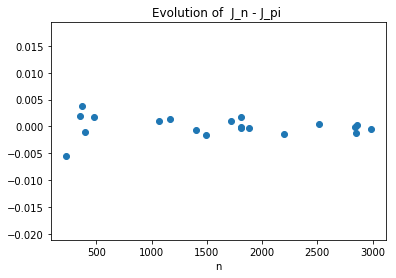

In [10]:
plt.scatter(N_values,J_diff) 
plt.title('Evolution of  J_n - J_pi ')
plt.xlabel('n')
plt.show() 

## Question 5

In [27]:
v_opt = [0.87691855, 0.92820033, 0.98817903, 0.00000000, 0.82369294, 0.92820033, 0.00000000, 0.77818504, 0.82369294,
         0.87691855, 0.82847001]

def Q_learning(n_states,n_actions,n_iter,epsilon,gamma,T_max,v_opt):
    
    Q = np.zeros((n_states,n_actions))
    for state in range(n_states):
        possible_actions = env.state_actions[state]
        impossible_actions = list(set([0,1,2,3]).difference(possible_actions))
        Q[state][impossible_actions] = -np.inf
    
    Visits = np.zeros((n_states,n_actions))
    
    norm_diff = []
    rewards = []
    reward_history = 0
    
    for i in range(n_iter):
        
        state = env.reset()
        t = 0
        term = False
        
        while t < T_max or not term :
            
            if random.uniform(0,1) > epsilon:
                action = np.argmax(Q[state])
            else:
                action = np.random.choice(env.state_actions[state])
                
            nexts, reward, term = env.step(state,action)
                 
            delta = reward + gamma*np.max(Q[nexts]) - Q[state,action]
            Q[state,action] += 1/(Visits[state,action]+1)*delta
            
            Visits[state,action] += 1
            
            state = nexts
            t += 1  
            reward_history += reward
        norm_diff.append(np.linalg.norm(np.max(Q,axis=1) - v_opt,ord = np.inf))
        rewards.append(reward_history)
            
    best_policy = np.argmax(Q,axis = 1)
    best_value = np.max(Q,axis = 1)
    
    return best_policy,best_value,norm_diff,rewards

In [28]:
n_states = 11
n_actions = 4

gamma = 0.95
epsilon = 10e-2

T_max = int(-np.log(10e-2)/(1-gamma)) # delta = 10e-2 , Rmax = 1
n_iter = 3000

best_policy,best_value,norm_diff,rewards = Q_learning(n_states,n_actions,n_iter,epsilon,gamma,T_max,v_opt)

### Description of the Q-learning parameters

**n_states** : Number of states in our environment

**n_actions** : Number of possible actions {up,down,right,left}

**gamma** : Discount factor

**epsilon** : Parameter of the epsilon-greedy optimization. Set to 10e-1 in order find a tradeoff between exploration & exploitation.

**T_max** : Maximal number of steps in a single episode

**n_iter** : Number of episodes

**v_opt** : Optimal value (given)

The learning rate alpha is set to be : 
$$\alpha(s,a) = \frac{1}{1+Visits(s,a)}$$

It satisfies the Robbins-Monro conditions

### Evaluation

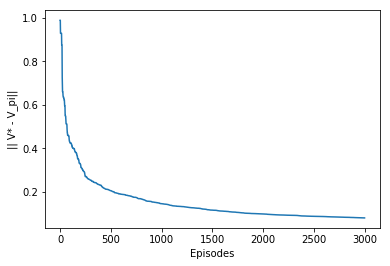

In [18]:
plt.plot(list(range(n_iter)),norm_diff)
plt.xlabel('Episodes')
plt.ylabel('|| V* - V_pi||')
plt.show()

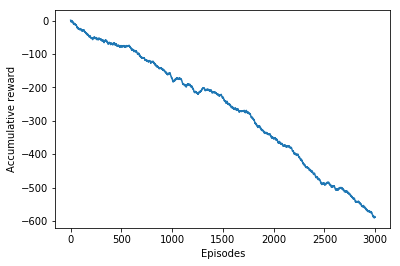

In [29]:
plt.plot(list(range(n_iter)),rewards)
plt.xlabel('Episodes')
plt.ylabel('Accumulative reward')
plt.show()

The negativity is coming from the fact that the reward for the state 6 is -1.

## Question 6

The optimal policy **is not affected** by the change in the initial distribution because it , by definition, achieves the best return starting from any initial state. 